In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.9.2


In [2]:
#data preprocessing
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()



11490434/11490434 [==============================] - 2s 0us/step


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


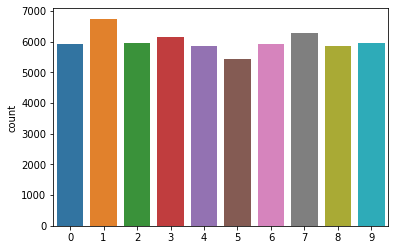

In [3]:
sns.countplot(y_train)


In [4]:
#check for null value
np.isnan(x_train).any()


False

In [5]:
np.isnan(x_test).any()


False

<h1> THERE ARE NO NULL VALUE SO NO NEED TO PREPROCESS THE DATA TO DEAL WITH NAN's

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

NORMALIZATION AND RESHAPING
---
Range OF PIXEL- 0(no pixel) To 255( brightest)

we convert this range to 0 to 1 by dividinbt all by 255

In [8]:
input_shape=(28,28,1)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train=x_train/255.0
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test=x_test/255.0

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
x_train.shape


(60000, 28, 28, 1)

In [11]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

ONE HOT ENCODING
---


In [12]:
#label encoding 
#our current testing datasets are currently categorial and is not continuous... so we convert to one-hot encoding
y_train=tf.one_hot(y_train.astype(np.int32),depth=10)
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)


In [13]:
y_train


<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [14]:
y_test


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

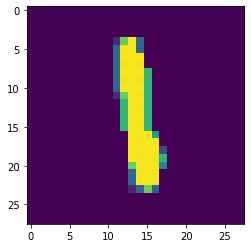

In [15]:
########now visualize the data
#x_train[200][:,:,0]
plt.imshow(x_train[200][:,:,0])



DEFINE THE MODEL
---
---



In [16]:
batch_size = 64
num_classes = 10
epochs = 1


In [25]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),#threshold point 0.25 used to remove overfitting
    tf.keras.layers.Conv2D(64,(3,3),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    
    
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-8), loss='categorical_crossentropy', metrics=['acc']) #1e-8=10^(-8)



FIT THE TRAINING DATA
---
---


In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=()):
    if(logs.get('acc')>0.995):
      print("\n Reached 99.5% acucracy so canceliing training!!")
      self.model.stop_training= True
  
callbacks= myCallback()


In [27]:
history = model.fit(x_train,  y_train,
                    batch_size= batch_size,
                    epochs = epochs,
                    validation_split=0.1,
                    callbacks=[callbacks]
                    )


844/844 [==============================] - 7s 7ms/step - loss: 0.2198 - acc: 0.9332 - val_loss: 0.0478 - val_acc: 0.9870


LOSS AND ACCURACY CURVES
---
---


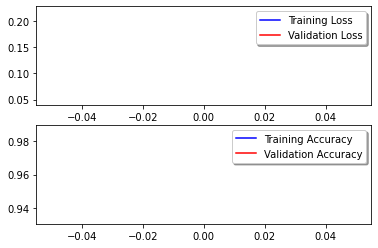

In [28]:
fig, ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b' ,label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss", axes= ax[0])
legend=ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label='Training Accuracy')
ax[1].plot(history.history['val_acc'],color='r', label='Validation Accuracy')
legend=ax[1].legend(loc='best', shadow=True)

In [29]:
test_loss, test_acc= model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0410 - acc: 0.9864


CONFUSION MATRIX
---


In [30]:
#predict the values from testing dataset
Y_pred = model.predict(x_test)
#convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
#convert testing observatiopn to one hot vectors
Y_true= np.argmax(y_test, axis=1)
#compute the confusion matrix
confusion_mtx= tf.math.confusion_matrix(Y_true, Y_pred_classes)


313/313 [==============================] - 1s 2ms/step


In [31]:
#Y_pred
#Y_pred_classes
#Y_true
#confusion_mtx

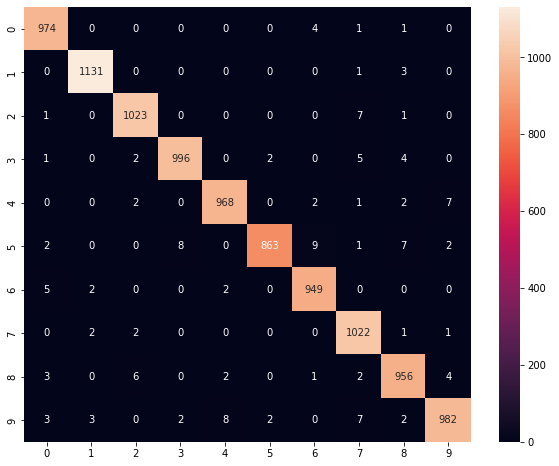

In [32]:
#plotting the matrix in heat map
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

